In [258]:
#importing libraries and models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [259]:
data=pd.read_csv('agaricus.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [322]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [260]:
#converting string data into integer so thatdata EDA and Data Modeling can be done
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data=data.apply(le.fit_transform)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [261]:
data.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [262]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [271]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [324]:
data.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [344]:
#statistical summary
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


class                          AxesSubplot(0.125,0.536818;0.0596154x0.343182)
cap-shape                   AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
cap-surface                 AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
cap-color                   AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
bruises                     AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
odor                        AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
gill-attachment             AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
gill-spacing                AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
gill-size                   AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
gill-color                  AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
stalk-shape                 AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
stalk-root                        AxesSubplot(0.125,0.125;0.0596154x0.343182)
stalk-surface-above-ring       AxesSubplot(0.196538,0.125;0.0596

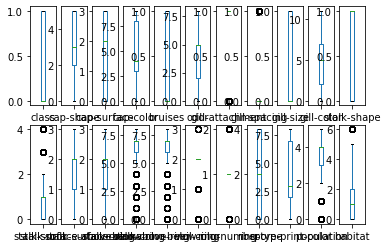

In [346]:
data.plot(kind='box',subplots=True,layout=(2,11))

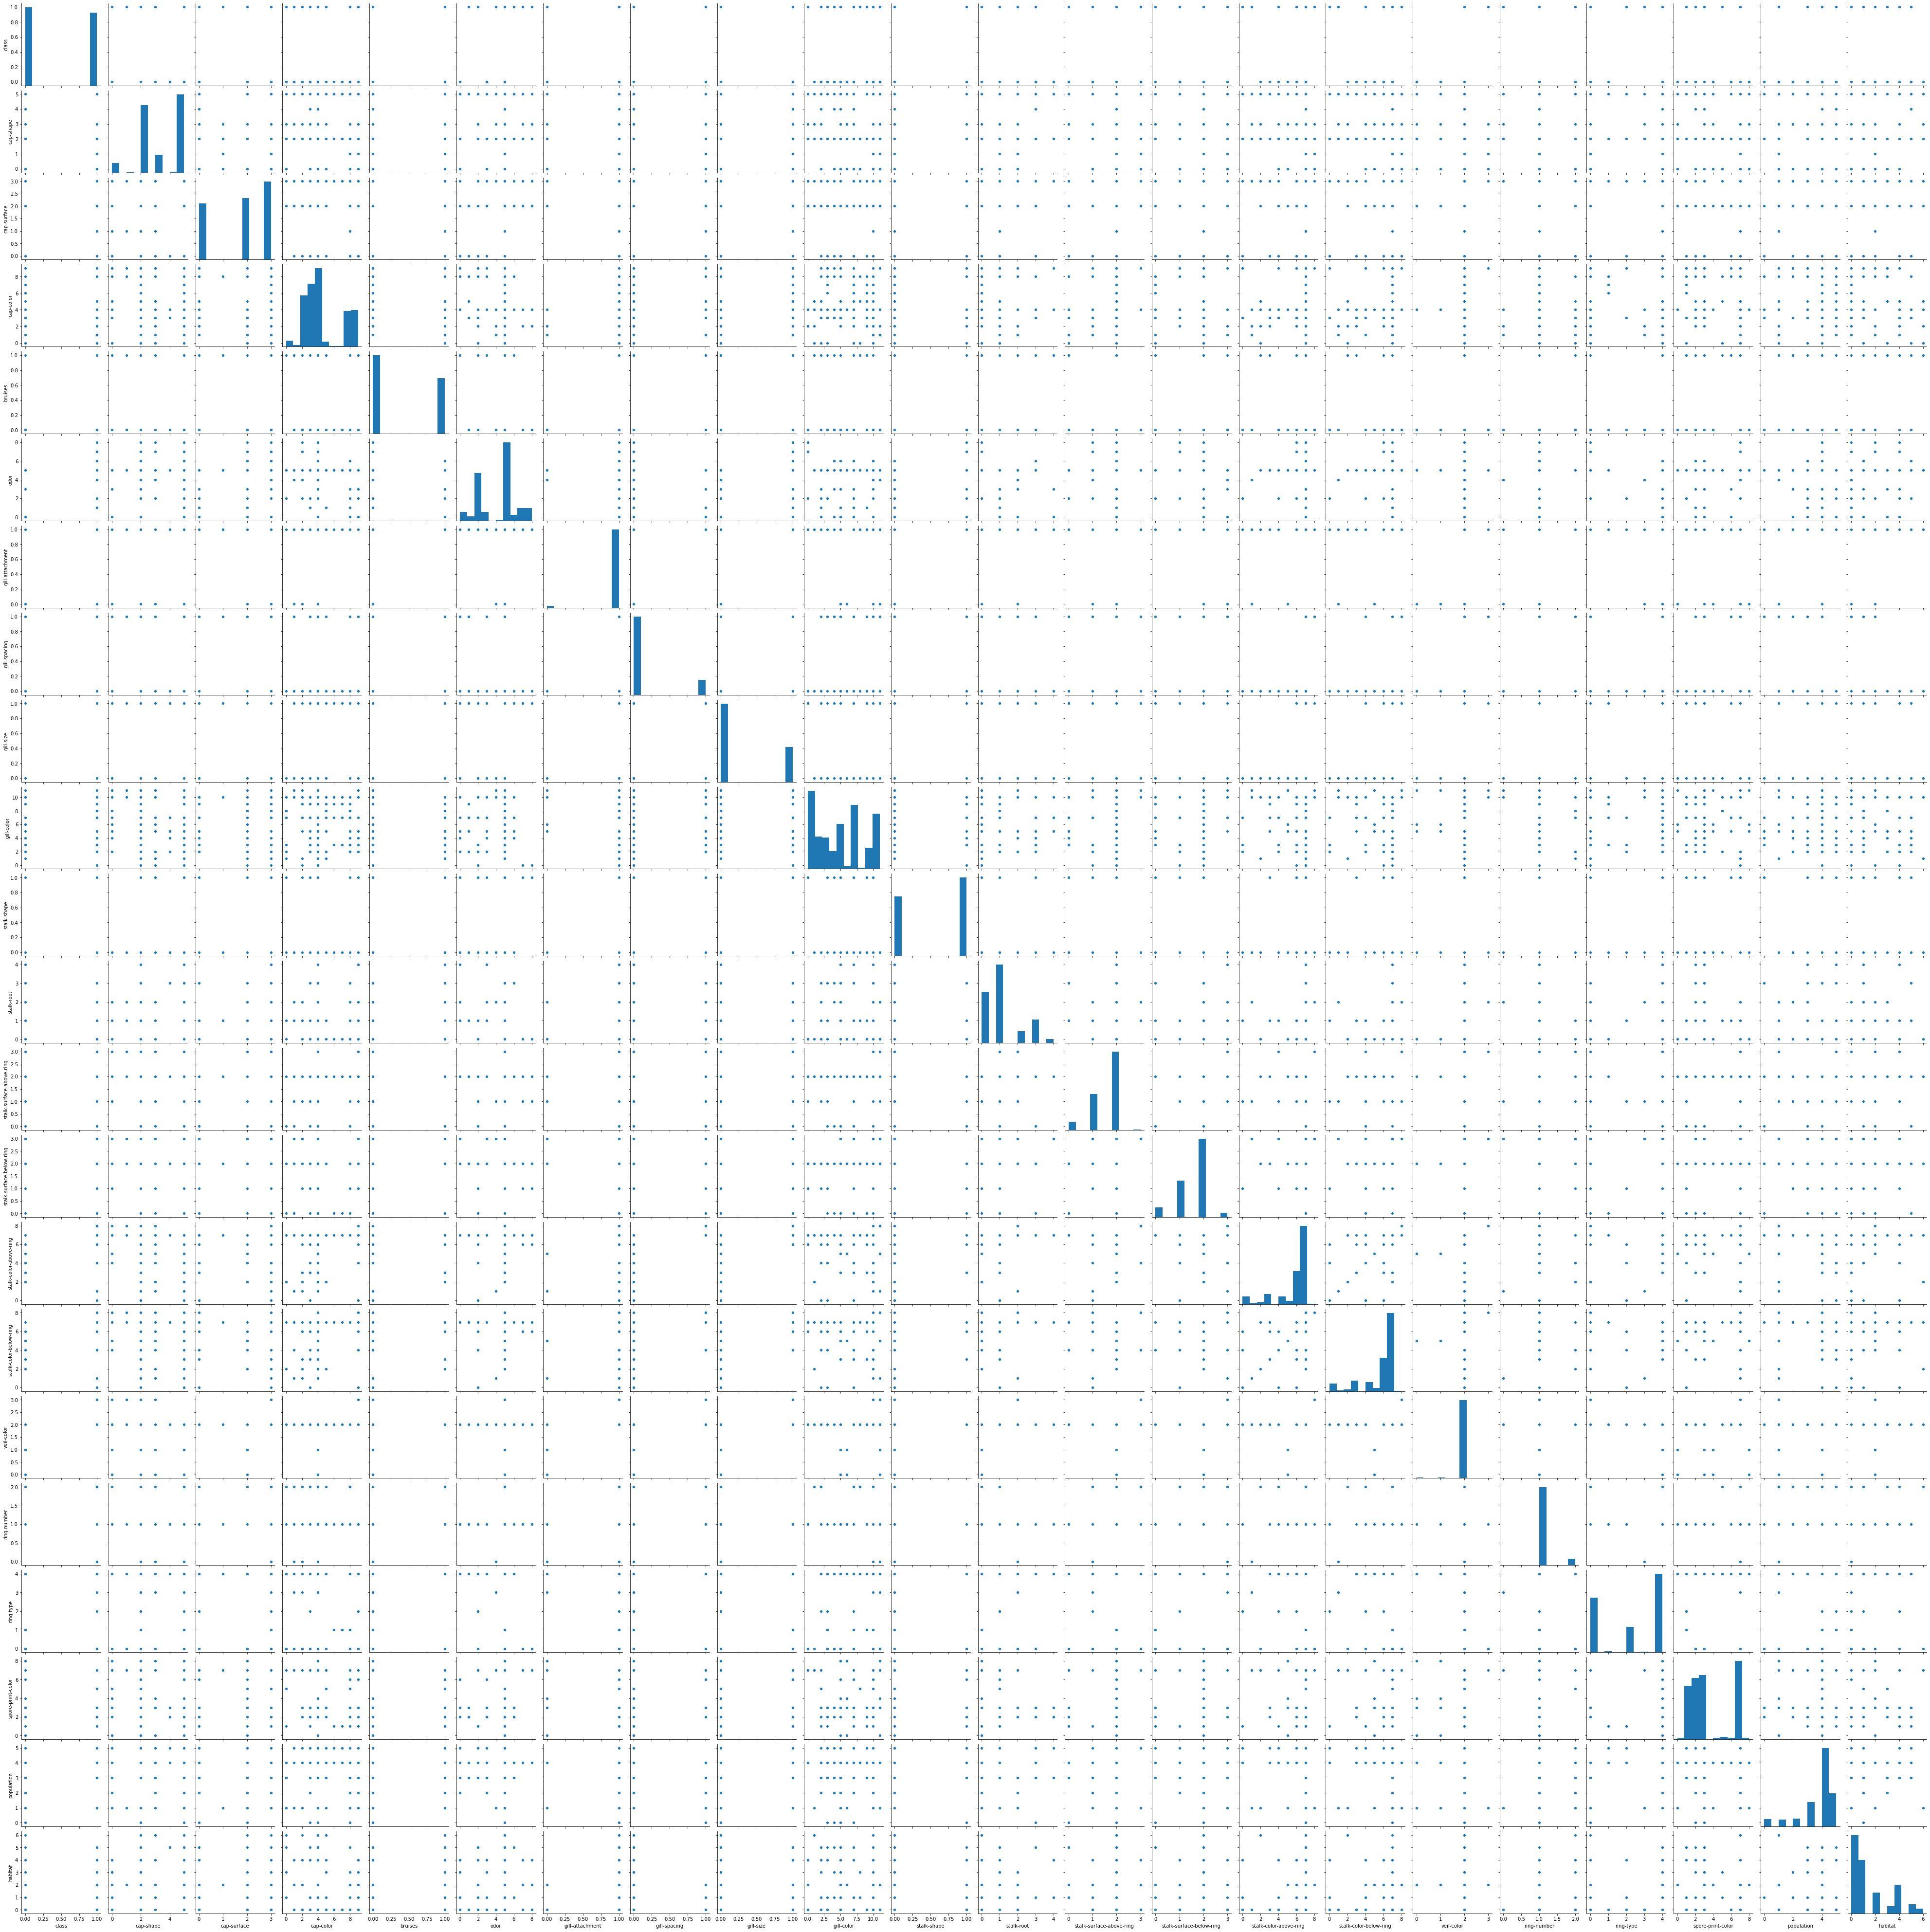

In [350]:
sns.pairplot(data)

In [331]:
#finding zscore for identification of outliers
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        2.03002809],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.29572966],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.86714922],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.28570978],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.28570978],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.28570978]])

In [332]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [333]:
#removing outliers
data_new=data[(z<3).all(axis=1)]

In [334]:
data_new

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,3,3,2,0,8,1,0,1,0,...,1,1,6,6,2,1,0,7,4,0
8116,1,3,3,4,0,7,1,0,1,0,...,2,1,6,7,2,1,0,7,4,2
8117,1,3,2,2,0,8,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0
8118,1,3,3,4,0,2,1,0,1,0,...,1,2,6,7,2,1,0,7,4,0


In [336]:
data.shape

(8124, 22)

In [337]:
data_new.shape

(6568, 22)

In [355]:
data_new.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

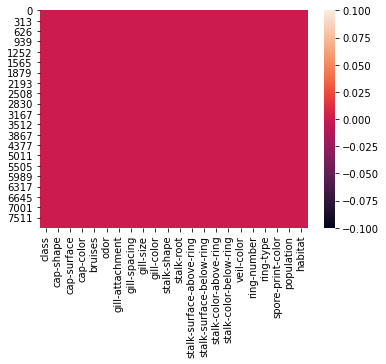

In [356]:
import seaborn as sns
sns.heatmap(data_new.isnull())

In [358]:
cor=data_new.corr()
cor

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.041049,0.235223,-0.118941,-0.545550,0.038242,NaN,-0.314238,0.654408,-0.590442,...,-0.264162,-0.247059,0.069612,0.080861,NaN,NaN,-0.444262,0.460590,0.198208,0.353835
cap-shape,0.041049,1.000000,-0.061992,-0.061742,-0.052396,0.002142,NaN,0.055180,0.034093,0.028382,...,-0.004952,-0.011604,-0.021180,-0.017630,NaN,NaN,0.017326,-0.041666,0.043156,-0.048958
cap-surface,0.235223,-0.061992,1.000000,0.022925,0.015582,0.023453,NaN,-0.288211,0.226429,-0.216945,...,0.056777,0.067680,0.088765,0.093584,NaN,NaN,-0.097091,0.272097,0.068736,0.163992
cap-color,-0.118941,-0.061742,0.022925,1.000000,0.095438,-0.401146,NaN,0.154626,-0.170878,0.129851,...,0.000758,0.026641,0.166256,0.173653,NaN,NaN,0.179044,-0.309276,-0.280522,0.098745
bruises,-0.545550,-0.052396,0.015582,0.095438,1.000000,-0.163205,NaN,-0.314238,-0.511471,0.646020,...,0.440257,0.455012,-0.145244,-0.122720,NaN,NaN,0.878052,-0.474957,0.173378,-0.192836
odor,0.038242,0.002142,0.023453,-0.401146,-0.163205,1.000000,NaN,0.002880,0.300757,-0.196607,...,0.016488,-0.040117,-0.037272,-0.043725,NaN,NaN,-0.348659,0.415223,0.068433,-0.051665
gill-attachment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gill-spacing,-0.314238,0.055180,-0.288211,0.154626,-0.314238,0.002880,NaN,1.000000,-0.120795,0.088151,...,-0.275736,-0.267819,0.259913,0.216313,NaN,NaN,-0.327368,-0.120044,-0.608529,-0.129173
gill-size,0.654408,0.034093,0.226429,-0.170878,-0.511471,0.300757,NaN,-0.120795,1.000000,-0.570292,...,0.018724,-0.024760,0.256163,0.224676,NaN,NaN,-0.489851,0.787711,0.141265,0.273586
gill-color,-0.590442,0.028382,-0.216945,0.129851,0.646020,-0.196607,NaN,0.088151,-0.570292,1.000000,...,0.219950,0.239056,-0.145980,-0.175899,NaN,NaN,0.686333,-0.647377,0.040449,-0.287643


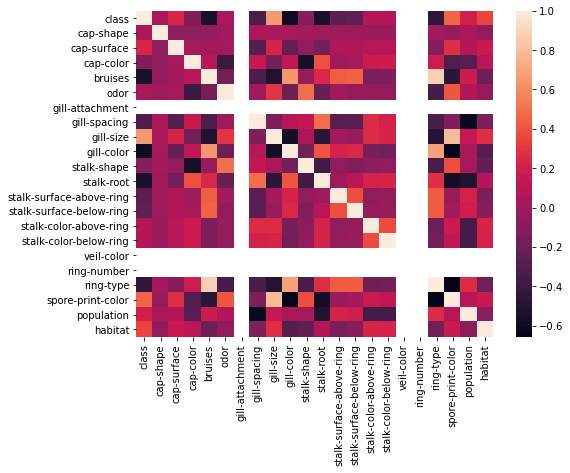

In [359]:
plt.figure(figsize=(8,6))
sns.heatmap(cor)

In [ ]:
# removing rows and columns with NaN or No-correlation
data.drop('veil-type',axis=1,inplace=True)

In [360]:
data_new.drop('gill-attachment',axis=1,inplace=True)

In [361]:
data_new.drop('veil-color',axis=1,inplace=True)

In [362]:
data_new.drop('ring-number',axis=1,inplace=True)

In [405]:
data_new

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,0,1,4,0,3,2,2,7,7,4,2,3,5
1,0,5,2,9,1,0,0,0,4,0,2,2,2,7,7,4,3,2,1
2,0,0,2,8,1,3,0,0,5,0,2,2,2,7,7,4,3,2,3
3,1,5,3,8,1,6,0,1,5,0,3,2,2,7,7,4,2,3,5
4,0,5,2,3,0,5,1,0,4,1,3,2,2,7,7,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,1,3,3,2,0,8,0,1,0,1,0,1,1,6,6,0,7,4,0
8116,1,3,3,4,0,7,0,1,0,1,0,2,1,6,7,0,7,4,2
8117,1,3,2,2,0,8,0,1,0,1,0,1,2,6,7,0,7,4,0
8118,1,3,3,4,0,2,0,1,0,1,0,1,2,6,7,0,7,4,0


In [370]:
x=data_new.iloc[:,1:19]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,0,1,4,0,3,2,2,7,7,4,2,3,5
1,5,2,9,1,0,0,0,4,0,2,2,2,7,7,4,3,2,1
2,0,2,8,1,3,0,0,5,0,2,2,2,7,7,4,3,2,3
3,5,3,8,1,6,0,1,5,0,3,2,2,7,7,4,2,3,5
4,5,2,3,0,5,1,0,4,1,3,2,2,7,7,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,3,3,2,0,8,0,1,0,1,0,1,1,6,6,0,7,4,0
8116,3,3,4,0,7,0,1,0,1,0,2,1,6,7,0,7,4,2
8117,3,2,2,0,8,0,1,0,1,0,1,2,6,7,0,7,4,0
8118,3,3,4,0,2,0,1,0,1,0,1,2,6,7,0,7,4,0


In [371]:
y=data_new.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8113    1
8116    1
8117    1
8118    1
8122    1
Name: class, Length: 6568, dtype: int32

In [372]:
x.shape

(6568, 18)

In [373]:
y.shape

(6568,)

In [374]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [375]:
x_train.shape

(5123, 18)

In [376]:
x_test.shape

(1445, 18)

In [377]:
y_train.shape

(5123,)

In [378]:
y_test.shape

(1445,)

In [379]:
#finding the best model for data analysis or feature prediction
lg=LogisticRegression() 

In [382]:
lg.fit(x_train,y_train)

LogisticRegression()

In [383]:
lg.score(x_train,y_train)

0.9551044309974625

In [384]:
predlg=lg.predict(x_test)
predlg

array([0, 1, 1, ..., 1, 1, 0])

In [385]:
print(y_test,predlg)

2503    0
6247    1
5156    1
2802    0
1919    0
       ..
2687    0
2834    0
6433    1
5298    1
1128    0
Name: class, Length: 1445, dtype: int32 [0 1 1 ... 1 1 0]


In [386]:
print("accuracy score is: ",accuracy_score(y_test,predlg))

accuracy score is:  0.9536332179930795


In [387]:
print("confusion matrix is: ",confusion_matrix(y_test,predlg))

confusion matrix is:  [[729  38]
 [ 29 649]]


In [388]:
print("classification_report is: ",classification_report(y_test,predlg))

classification_report is:                precision    recall  f1-score   support

           0       0.96      0.95      0.96       767
           1       0.94      0.96      0.95       678

    accuracy                           0.95      1445
   macro avg       0.95      0.95      0.95      1445
weighted avg       0.95      0.95      0.95      1445



In [401]:
#best model
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
1.0
[[767   0]
 [  0 678]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       1.00      1.00      1.00       678

    accuracy                           1.00      1445
   macro avg       1.00      1.00      1.00      1445
weighted avg       1.00      1.00      1.00      1445



In [399]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print(knn.score(x_train,y_train))
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.999804801873902
0.995847750865052
[[761   6]
 [  0 678]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       767
           1       0.99      1.00      1.00       678

    accuracy                           1.00      1445
   macro avg       1.00      1.00      1.00      1445
weighted avg       1.00      1.00      1.00      1445



In [396]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc)) 

0.9990240093695101
0.9986159169550173
[[767   0]
 [  2 676]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       1.00      1.00      1.00       678

    accuracy                           1.00      1445
   macro avg       1.00      1.00      1.00      1445
weighted avg       1.00      1.00      1.00      1445



In [402]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
print(gnb.score(x_train,y_train))
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8844427093499903
0.8705882352941177
[[724  43]
 [144 534]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.89       767
           1       0.93      0.79      0.85       678

    accuracy                           0.87      1445
   macro avg       0.88      0.87      0.87      1445
weighted avg       0.88      0.87      0.87      1445



In [403]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
print(mnb.score(x_train,y_train))
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.8235408940074175
0.8214532871972319
[[746  21]
 [237 441]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85       767
           1       0.95      0.65      0.77       678

    accuracy                           0.82      1445
   macro avg       0.86      0.81      0.81      1445
weighted avg       0.85      0.82      0.82      1445



In [404]:
#saving best model to outer file
import pickle

filename='pickledtcfile.pkl'
pickle.dump(dtc,open(filename,'wb'))
model=pickle.load(open(filename,'rb'))
model.predict(x_test)

array([0, 1, 1, ..., 1, 1, 0])